In [1]:
user = "Alex"
pathtorepo = "C:\\Users\\" * user * "\\Desktop\\"

using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
include("C:\\Users\\" * user * "\\Desktop\\dynamical-systems\\system.jl")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


HR_mem (generic function with 1 method)

In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems, Statistics
x1 = y1 = z1 = x2 = y2 = z2  = interval(-10, 10)
z = interval(-100, 100)
box = x1 × y1 × z1 × x2 × y2 × z2 × z
using CairoMakie
using LinearAlgebra

In [156]:
function HR_mem(u, p, t)
    function Γ(x)
        return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
    end
    ρ(z, k1_me, k2_me) = k1_me + k2_me * z^2

    a, b, c, d, s, xr, r,  I, vs, k1, k2, k1_me, k2_me  = p
    x1, y1, z1, x2, y2, z2, z = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k1 * ( x1 - vs ) * Γ(x2) + ρ(z, k1_me, k2_me)*(x2 - x1)
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )                                                                                                                                          
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k2 * ( x2 - vs ) * Γ(x1) + ρ(z, k1_me, k2_me)*(x1 - x2)
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )

    du7 = x1
    
    return SVector(du1, du2, du3, du4, du5, du6, du7)
end

HR_mem (generic function with 1 method)

In [33]:
@inbounds function jacob_HR_mem(u, p, t)

    a, b, c, d, s, xr, r,  I, vs, k1, k2, k1_me, k2_me  = p
    x1, y1, z1, x2, y2, z2, z = u

    function sigma(x)
        return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
    end
    memristor(z, k1_me, k2_me) = k1_me + k2_me * z^2

    sigmax1der = 10.0 * exp( -10.0*( x1 + 0.25 ) ) / ( 1.0 + exp( -10.0*( x1 + 0.25 ) ) )^2
    sigmax2der = 10.0 * exp( -10.0*( x2 + 0.25 ) ) / ( 1.0 + exp( -10.0*( x2 + 0.25 ) ) )^2
    
    x1x1 = 2.0*b*x1 - 3.0 * a * x1^2 - k1 * sigma(x2) - memristor(z, k1_me, k2_me)
    x1y1 = 1.0
    x1z1 = -1.0
    x1x2 = -k1 * ( x1 - vs ) * sigmax2der + memristor(z, k1_me, k2_me)
    x1y2 = 0.0
    x1z2 = 0.0
    x1z = k2_me * 2.0 * z * ( x2 - x1 )

    y1x1 = -2.0 * d * x1
    y1y1 = -1.0
    y1z1 = 0.0
    y1x2 = 0.0
    y1y2 = 0.0
    y1z2 = 0.0
    y1z = 0.0

    z1x1 = r * s
    z1y1 = 0.0
    z1z1 = -r
    z1x2 = 0.0
    z1y2 = 0.0
    z1z2 = 0.0
    z1z = 0.0

    zx1 = 1.0
    zy1 = 0.0
    zz1 = 0.0
    zx2 = -1.0
    zy2 = 0.0
    zz2 = 0.0

    zz = 0.0

    # -------------------------------------

    x2x2 = 2.0*b*x2 - 3.0 * a * x2^2 - k2 * sigma(x1) - memristor(z, k1_me, k2_me)
    x2y2 = 1.0
    x2z2 = -1.0
    x2x1 = -k2 * ( x2 - vs ) * sigmax1der + memristor(z, k1_me, k2_me)
    x2y1 = 0.0
    x2z1 = 0.0
    x2z = k2_me * 2.0 * z * ( x1 - x2 )

    y2x2 = -2.0 * d * x2
    y2y2 = -1.0
    y2z2 = 0.0
    y2x1 = 0.0
    y2y1 = 0.0
    y2z1 = 0.0
    y2z = 0.0

    z2x2 = r * s
    z2y2 = 0.0
    z2z2 = -r
    z2x1 = 0.0
    z2y1 = 0.0
    z2z1 = 0.0
    z2z = 0.0

    SMatrix{7,7}(x1x1, y1x1, z1x1, x2x1, y2x1, z2x1, zx1,
    x1y1, y1y1, z1y1, x2y1, y2y1, z2y1, zy1,
    x1z1, y1z1, z1z1, x2z1, y2z1, z2z1, zz1,
    x1x2, y1x2, z1x2, x2x2, y2x2, z2x2, zx2,
    x1y2, y1y2, z1y2, x2y2, y2y2, z2y2, zy2,
    x1z2, y1z2, z1z2, x2z2, y2z2, z2z2, zz2,
    x1z, y1z, z1z, x2z, y2z, z2z, zz)
end

jacob_HR_mem (generic function with 1 method)

In [157]:
a = 1.0; b = 3.0; c = 1.0; d = 5.0
xr = -1.6; r = 0.01; s = 5.0; I = 4.0; vs = 2.0
k1= -0.17; k2 = -0.17
k1_me = 0.1103
k2_me = 0.5
u0 = SA[-1.5, 0, 0, 2.5, -6.354990997836504, 3.5694446819312655, -1.0]
p = [a, b, c, d, s, xr, r, I, vs, k1, k2, k1_me, k2_me];

In [121]:
Jacobi = jacob_HR_mem(u0, p, u0)

7×7 SMatrix{7, 7, Float64, 49} with indices SOneTo(7)×SOneTo(7):
 -16.1903     1.0  -1.0     0.6103   0.0   0.0   -4.0
  15.0       -1.0   0.0     0.0      0.0   0.0    0.0
   0.05       0.0  -0.01    0.0      0.0   0.0    0.0
   0.610303   0.0   0.0    -4.3603   1.0  -1.0    4.0
   0.0        0.0   0.0   -25.0     -1.0   0.0    0.0
   0.0        0.0   0.0     0.05     0.0  -0.01   0.0
   1.0        0.0   0.0    -1.0      0.0   0.0    0.0

In [122]:
det(Jacobi)

-0.015731998479538684

In [158]:
t_start = 0.0
t_finish = 1000.0
tspan = (t_start, t_finish)

(0.0, 1000.0)

In [159]:
prob = ODEProblem(HR_mem, u0, tspan, p);

In [160]:
sol = solve(prob, Vern9(), abstol=1e-14, reltol=1e-14, maxiters=10e6)
len = length(sol)
println("Length: $(len)")

In [75]:
fp = sol[end]

7-element SVector{7, Float64} with indices SOneTo(7):
 -0.6141543648892819
 -0.885927919562785
  4.929228175552463
 -0.6141543648893061
 -0.8859279195629354
  4.9292281755545995
  9.281059028065263

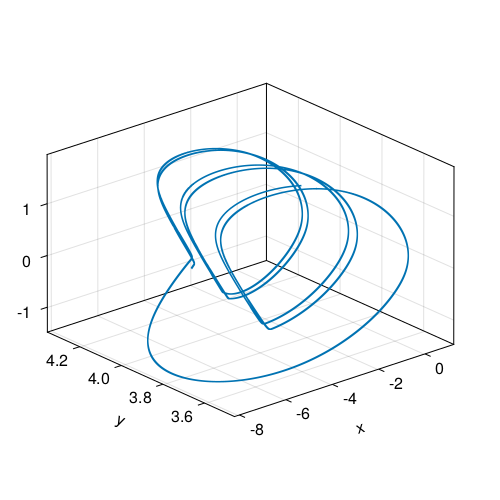

CairoMakie.Screen{IMAGE}


In [155]:
indexx, indexy, indexz = 2, 3, 1
tstart, tend = 3500000, 9500000
f = Figure(resolution = (500, 500))
axis3d = Axis3(f[1, 1])
lines!(axis3d, sol[indexx, tstart:tend], sol[indexy, tstart:tend], sol[indexz, tstart:tend])
display(f)

In [141]:
integ_set = (alg = Vern9(), adaptive = false, dt = 0.001)
ds = CoupledODEs(HR_mem, sol[end], p, diffeq = integ_set)

7-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  HR_mem
 ODE solver:    Vern9
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, -0.17, -0.17, 0.1103, 0.5]
 time:          0.0
 state:         [-1.263968571968574, -6.772555680859712, 4.055245551291493, -1.263968571968574, -6.772555680859712, 4.055245551291493, 9.54896937064704]


In [143]:
Λs = lyapunovspectrum(ds, 1500)

7-element Vector{Float64}:
   0.0008126386272825784
  -0.005468056774456663
  -0.003947875730965332
  -0.013310610361287013
  -0.9184945811230878
  -8.895531584599977
 -Inf